In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [64]:
DATA_PATH = "heart_augmented.csv"

df = pd.read_csv(DATA_PATH)
features = df.columns
print("Data shape:", df.shape)
display(df.head())
display(df.describe())
print("Missing values:\n", df.isnull().sum())


Data shape: (303, 20)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,hr_rest,hr_active,hrv,steps,sleep_quality,stress_level
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,72.483571,156.103703,38.393162,11244.882085,8,66.573980
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,69.308678,186.790984,31.330179,7538.332648,7,67.287178
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,73.238443,173.173274,23.319196,8328.725491,5,83.157689
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,77.615149,190.776649,72.440665,8374.075526,6,42.789634
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,68.829233,157.084286,59.815485,10366.179920,7,37.842981


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,hr_rest,hr_active,hrv,steps,sleep_quality,stress_level
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554,69.961940,149.598851,51.082173,8126.020861,6.650165,48.806028
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835,4.909560,25.106746,14.813631,1518.208836,1.704025,17.916701
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,53.793663,48.888647,9.546700,3655.616933,4.000000,2.280927
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,66.567664,133.853808,41.500902,7141.340755,5.000000,37.987946
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000,70.291044,150.944521,50.446342,8187.836754,7.000000,49.426943
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000,73.138240,168.807505,60.473872,9095.202216,8.000000,60.634531
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000,89.263657,202.584245,89.485731,11659.628610,9.000000,100.000000


Missing values:
 age              0
sex              0
cp               0
trestbps         0
chol             0
fbs              0
restecg          0
thalach          0
exang            0
oldpeak          0
slope            0
ca               0
thal             0
target           0
hr_rest          0
hr_active        0
hrv              0
steps            0
sleep_quality    0
stress_level     0
dtype: int64


In [65]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df.drop('target', axis=1)
y = df['target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Model Training and Evaluation (RF, XGB, NN)

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, accuracy_score, f1_score

from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

In [67]:
def evaluate_model(model, X_tr, y_tr, X_te, y_te):
    model.fit(X_tr, y_tr)
    y_pred = model.predict(X_te)
    y_prob = model.predict_proba(X_te)[:, 1]
    print(classification_report(y_te, y_pred))
    print("AUC: {:.3f}".format(roc_auc_score(y_te, y_prob)))
    return y_prob

In [68]:
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(50,), max_iter=1000, random_state=42)
}

In [69]:
probs = {}
for name, model in models.items():
    print(f"\n{name} Performance:")
    probs[name] = evaluate_model(model, X_train, y_train, X_test, y_test)


Random Forest Performance:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        29
           1       0.93      0.88      0.90        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61

AUC: 0.936

XGBoost Performance:
              precision    recall  f1-score   support

           0       0.78      0.86      0.82        29
           1       0.86      0.78      0.82        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61

AUC: 0.947

Neural Network Performance:
              precision    recall  f1-score   support

           0       0.81      0.90      0.85        29
           1       0.90      0.81      0.85        32

    accuracy                           0.85        61
   macro avg       0.85    

ROC Curve Visualization

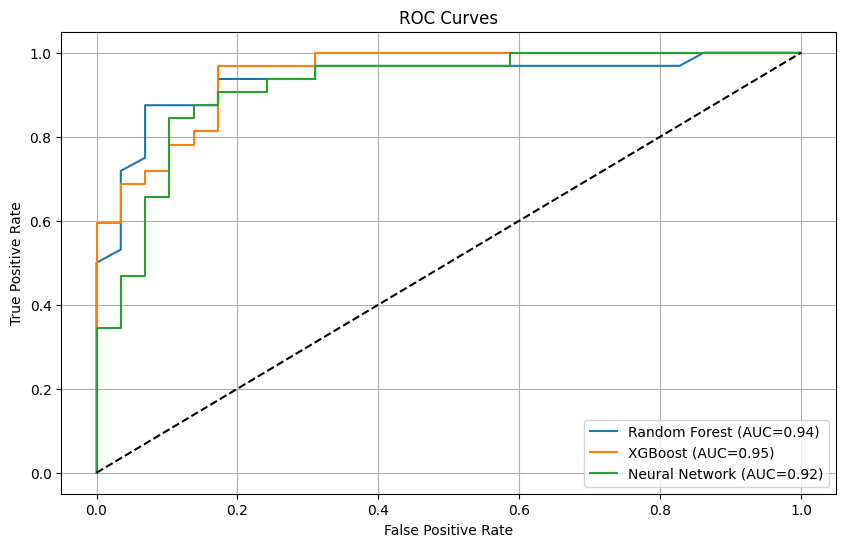

In [70]:
plt.figure(figsize=(10, 6))
for name, y_prob in probs.items():
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc:.2f})")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend()
plt.grid(True)
plt.show()


SHAP & LIME

SHAP Explanation for XGBoost:


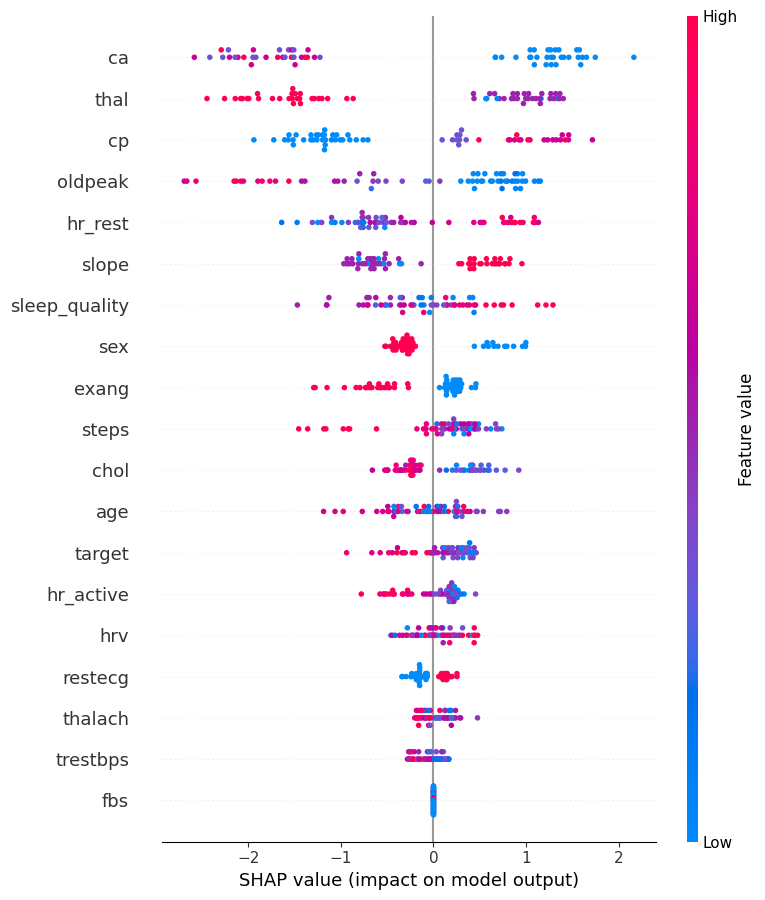

LIME Explanation for Neural Network:


In [71]:
# SHAP for XGBoost
import shap

print("SHAP Explanation for XGBoost:")
shap_explainer = shap.Explainer(models["XGBoost"], X_train)
shap_values = shap_explainer(X_test)
shap.summary_plot(shap_values, feature_names= df.columns)

# LIME for Neural Network
import lime
import lime.lime_tabular

print("LIME Explanation for Neural Network:")
lime_explainer = lime.lime_tabular.LimeTabularExplainer(
    X_train, feature_names=X.columns, class_names=['No Disease', 'Disease'], discretize_continuous=True
)
idx = 6 # Choose a test sample
lime_exp = lime_explainer.explain_instance(X_test[idx], models["Neural Network"].predict_proba, num_features=5)
lime_exp.show_in_notebook(show_all=False)


In [72]:
def pad_and_reshape(X, target_shape=(4, 4, 2)):
    n_samples, n_features = X.shape
    needed = np.prod(target_shape)
    pad_len = (needed - n_features) if n_features < needed else 0
    X_padded = np.hstack([X, np.zeros((n_samples, pad_len))])
    X_reshaped = X_padded.reshape(n_samples, *target_shape)
    return X_reshaped

X_cnn = pad_and_reshape(X_scaled, target_shape=(4, 4, 2))
X_train_cnn, X_test_cnn, y_train_cnn, y_test_cnn = train_test_split(
    X_cnn, y, test_size=0.2, stratify=y, random_state=42
)

# Build simple CNN
from tensorflow.keras import layers, models

cnn_input = layers.Input(shape=(4, 4, 2))
x = layers.Conv2D(32, (2, 2), activation='relu')(cnn_input)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Flatten(name="feature_layer")(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dropout(0.5)(x)
cnn_output = layers.Dense(1, activation='sigmoid')(x)

cnn_model = models.Model(inputs=cnn_input, outputs=cnn_output)
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

cnn_model.fit(X_train_cnn, y_train_cnn, validation_split=0.2, epochs=20, batch_size=16, verbose=0)

feature_extractor = models.Model(inputs=cnn_model.input, outputs=cnn_model.get_layer("feature_layer").output)
X_train_feat = feature_extractor.predict(X_train_cnn)
X_test_feat = feature_extractor.predict(X_test_cnn)

xgb_on_cnn = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_on_cnn.fit(X_train_feat, y_train_cnn)
y_pred_xgb_cnn = xgb_on_cnn.predict(X_test_feat)

print("CNN+XGB Accuracy:", accuracy_score(y_test_cnn, y_pred_xgb_cnn))
print(classification_report(y_test_cnn, y_pred_xgb_cnn))


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
CNN+XGB Accuracy: 0.7540983606557377
              precision    recall  f1-score   support

           0       0.76      0.68      0.72        28
           1       0.75      0.82      0.78        33

    accuracy                           0.75        61
   macro avg       0.76      0.75      0.75        61
weighted avg       0.75      0.75      0.75        61



Stacking Classifier (RF, XGB, NN)

In [73]:
X_train_flat = X_train_cnn.reshape(X_train_cnn.shape[0], -1)
X_test_flat = X_test_cnn.reshape(X_test_cnn.shape[0], -1)

base_estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)),
    ('nn', MLPClassifier(hidden_layer_sizes=(50,), max_iter=1000, random_state=42))
]

stacking_clf = StackingClassifier(
    estimators=base_estimators,
    final_estimator=LogisticRegression(),
    cv=5,
    stack_method='predict_proba'
)

stacking_clf.fit(X_train_flat, y_train_cnn)
stacked_pred = stacking_clf.predict(X_test_flat)
stacked_proba = stacking_clf.predict_proba(X_test_flat)[:, 1]

print("Stacked Model Performance:")
print(classification_report(y_test_cnn, stacked_pred))
print("AUC:", roc_auc_score(y_test_cnn, stacked_proba))

print("\nBase Model Comparison:")
for name, model in base_estimators:
    model.fit(X_train_flat, y_train_cnn)
    pred = model.predict(X_test_flat)
    proba = model.predict_proba(X_test_flat)[:, 1]
    print(f"{name} Performance:")
    print(classification_report(y_test_cnn, pred))
    print("AUC:", roc_auc_score(y_test_cnn, proba))


Stacked Model Performance:
              precision    recall  f1-score   support

           0       0.88      0.75      0.81        28
           1       0.81      0.91      0.86        33

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.83        61

AUC: 0.9036796536796537

Base Model Comparison:
rf Performance:
              precision    recall  f1-score   support

           0       0.86      0.64      0.73        28
           1       0.75      0.91      0.82        33

    accuracy                           0.79        61
   macro avg       0.80      0.78      0.78        61
weighted avg       0.80      0.79      0.78        61

AUC: 0.9090909090909092
xgb Performance:
              precision    recall  f1-score   support

           0       0.95      0.71      0.82        28
           1       0.80      0.97      0.88        33

    accuracy                           0.85       

TabTransformer: PyTorch Implementation

In [74]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

cat_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
cont_cols = [col for col in df.columns if col not in cat_cols]

X_cat = df[cat_cols].copy()
X_cont = df[cont_cols].copy()

for col in cat_cols:
    X_cat[col] = LabelEncoder().fit_transform(X_cat[col])

X_cont = pd.DataFrame(StandardScaler().fit_transform(X_cont), columns=cont_cols)

X_cat_tr, X_cat_te, X_cont_tr, X_cont_te, y_tr, y_te = train_test_split(
    X_cat, X_cont, y, test_size=0.2, stratify=y, random_state=42
)

X_cat_tr = torch.tensor(X_cat_tr.values, dtype=torch.long)
X_cat_te = torch.tensor(X_cat_te.values, dtype=torch.long)
X_cont_tr = torch.tensor(X_cont_tr.values, dtype=torch.float32)
X_cont_te = torch.tensor(X_cont_te.values, dtype=torch.float32)
y_tr_tensor = torch.tensor(y_tr.values, dtype=torch.long)
y_te_tensor = torch.tensor(y_te.values, dtype=torch.long)

train_data = TensorDataset(X_cat_tr, X_cont_tr, y_tr_tensor)
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)

class TabTransformer(nn.Module):
    def __init__(self, categories, num_cont, dim, depth, heads, attn_dropout, ff_dropout, num_classes):
        super().__init__()
        self.embeds = nn.ModuleList([nn.Embedding(cat, dim) for cat in categories])
        self.transformer = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(d_model=dim, nhead=heads, dropout=attn_dropout, batch_first=True), num_layers=depth
        )
        self.fc_cont = nn.Linear(num_cont, dim)
        self.classifier = nn.Sequential(
            nn.Linear(dim, 64), nn.ReLU(), nn.Dropout(ff_dropout), nn.Linear(64, num_classes)
        )

    def forward(self, x_cat, x_cont):
        x_cat_emb = torch.stack([emb(x_cat[:, i]) for i, emb in enumerate(self.embeds)], dim=1)
        x_cat_trans = self.transformer(x_cat_emb).mean(dim=1)
        x_cont_proj = self.fc_cont(x_cont)
        x = x_cat_trans + x_cont_proj
        return self.classifier(x)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
tab_model = TabTransformer(
    categories=[df[c].nunique() for c in cat_cols],
    num_cont=len(cont_cols),
    dim=32, depth=4, heads=4, attn_dropout=0.1, ff_dropout=0.1, num_classes=2
).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(tab_model.parameters(), lr=0.001)

for epoch in range(10):
    tab_model.train()
    total_loss = 0
    for xb_cat, xb_cont, yb in train_loader:
        xb_cat, xb_cont, yb = xb_cat.to(device), xb_cont.to(device), yb.to(device)
        optimizer.zero_grad()
        out = tab_model(xb_cat, xb_cont)
        loss = loss_fn(out, yb)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}: Loss={total_loss:.4f}")

tab_model.eval()
with torch.no_grad():
    out = tab_model(X_cat_te.to(device), X_cont_te.to(device))
    preds = torch.argmax(out, 1).cpu().numpy()
print("TabTransformer Accuracy:", accuracy_score(y_te, preds))
print("TabTransformer F1 Score:", f1_score(y_te, preds))


Epoch 1: Loss=4.9215
Epoch 2: Loss=3.4830
Epoch 3: Loss=2.6490
Epoch 4: Loss=2.4499
Epoch 5: Loss=2.3427
Epoch 6: Loss=2.1471
Epoch 7: Loss=1.6709
Epoch 8: Loss=1.4452
Epoch 9: Loss=1.2593
Epoch 10: Loss=0.9992
TabTransformer Accuracy: 0.9180327868852459
TabTransformer F1 Score: 0.927536231884058


Diabetes Dataset: TabTransformer Example

In [75]:
diabetes_url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
diabetes_cols = [
    'Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin',
    'BMI','DiabetesPedigreeFunction','Age','Outcome'
]
diabetes_df = pd.read_csv(diabetes_url, names=diabetes_cols)

In [76]:
X_d = diabetes_df.drop("Outcome", axis=1)
y_d = diabetes_df["Outcome"]

scaler_d = StandardScaler()
X_d_scaled = scaler_d.fit_transform(X_d)

X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_d_scaled, y_d, test_size=0.2, stratify=y_d, random_state=42)

X_train_d_tensor = torch.tensor(X_train_d, dtype=torch.float32)
X_test_d_tensor = torch.tensor(X_test_d, dtype=torch.float32)
y_train_d_tensor = torch.tensor(y_train_d.values, dtype=torch.long)
y_test_d_tensor = torch.tensor(y_test_d.values, dtype=torch.long)

train_dataset_d = TensorDataset(X_train_d_tensor, y_train_d_tensor)
train_loader_d = DataLoader(train_dataset_d, batch_size=32, shuffle=True)

class DiabetesTabTransformer(nn.Module):
    def __init__(self, num_cont, dim, depth, heads, attn_dropout, ff_dropout, num_classes):
        super().__init__()
        self.fc_cont = nn.Linear(num_cont, dim)
        self.transformer = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(d_model=dim, nhead=heads, dropout=attn_dropout, batch_first=True), num_layers=depth
        )
        self.classifier = nn.Sequential(
            nn.Linear(dim, 64), nn.ReLU(), nn.Dropout(ff_dropout), nn.Linear(64, num_classes)
        )
    def forward(self, x_cont):
        x = self.fc_cont(x_cont).unsqueeze(1)
        x = self.transformer(x).mean(dim=1)
        return self.classifier(x)

diab_model = DiabetesTabTransformer(
    num_cont=X_train_d.shape[1], dim=32, depth=3, heads=4, attn_dropout=0.1, ff_dropout=0.1, num_classes=2
).to(device)

loss_fn_d = nn.CrossEntropyLoss()
optimizer_d = optim.Adam(diab_model.parameters(), lr=0.001)

for epoch in range(10):
    diab_model.train()
    total_loss = 0
    for xb, yb in train_loader_d:
        xb, yb = xb.to(device), yb.to(device)
        optimizer_d.zero_grad()
        out = diab_model(xb)
        loss = loss_fn_d(out, yb)
        loss.backward()
        optimizer_d.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}: Loss={total_loss:.4f}")

diab_model.eval()
with torch.no_grad():
    out = diab_model(X_test_d_tensor.to(device))
    preds = torch.argmax(out, 1).cpu().numpy()
print("Diabetes Accuracy:", accuracy_score(y_test_d, preds))
print("Diabetes F1 Score:", f1_score(y_test_d, preds))


Epoch 1: Loss=11.3336
Epoch 2: Loss=9.9731
Epoch 3: Loss=9.9941
Epoch 4: Loss=10.2297
Epoch 5: Loss=10.3354
Epoch 6: Loss=9.4915
Epoch 7: Loss=9.5008
Epoch 8: Loss=9.4680
Epoch 9: Loss=9.0779
Epoch 10: Loss=9.4330
Diabetes Accuracy: 0.7142857142857143
Diabetes F1 Score: 0.5510204081632653


In [77]:
X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf.fit(X_train_scaled, y_train)

y_pred = rf.predict(X_test_scaled)
y_proba = rf.predict_proba(X_test_scaled)[:, 1]

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_proba))

Random Forest Accuracy: 0.7597402597402597
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.85      0.82       100
           1       0.68      0.59      0.63        54

    accuracy                           0.76       154
   macro avg       0.74      0.72      0.73       154
weighted avg       0.75      0.76      0.76       154

AUC: 0.8147222222222222
